# Customer Segmentation using K-Means Clustering

### This project applies K-Means clustering algorithm to segment customers based on features such as spending behavior and customer demographics.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### EDA

In [ ]:
df.shape

(200, 5)

In [ ]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Univariate analysis

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
num_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Distplots

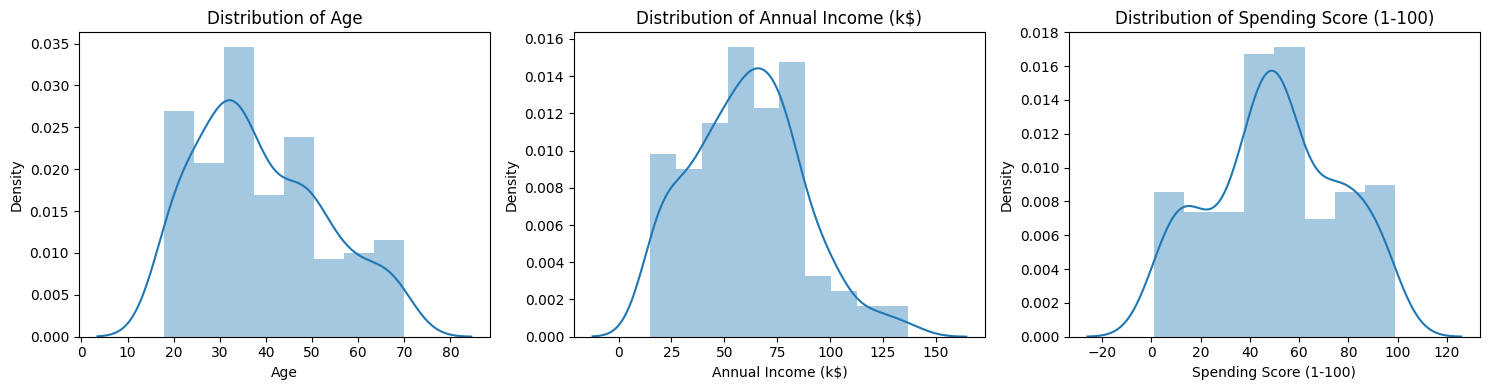

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
for i, col in enumerate(num_cols):
  sns.distplot(df[col], ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

KDE plot

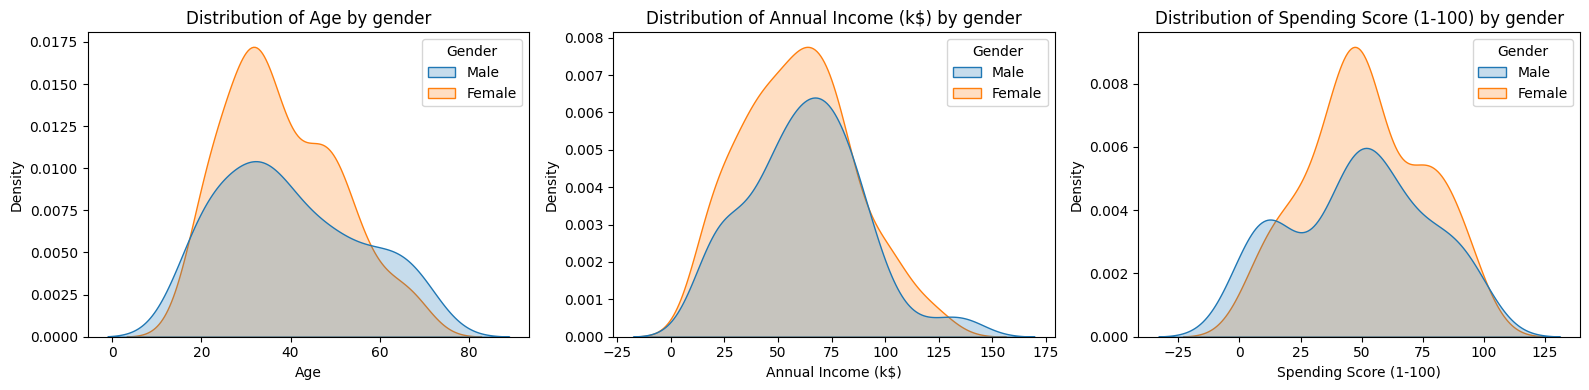

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
for i,col in enumerate(num_cols):
  sns.kdeplot(data=df, x=col, hue='Gender', fill=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col} by gender')
plt.tight_layout()
plt.show()

Boxplot

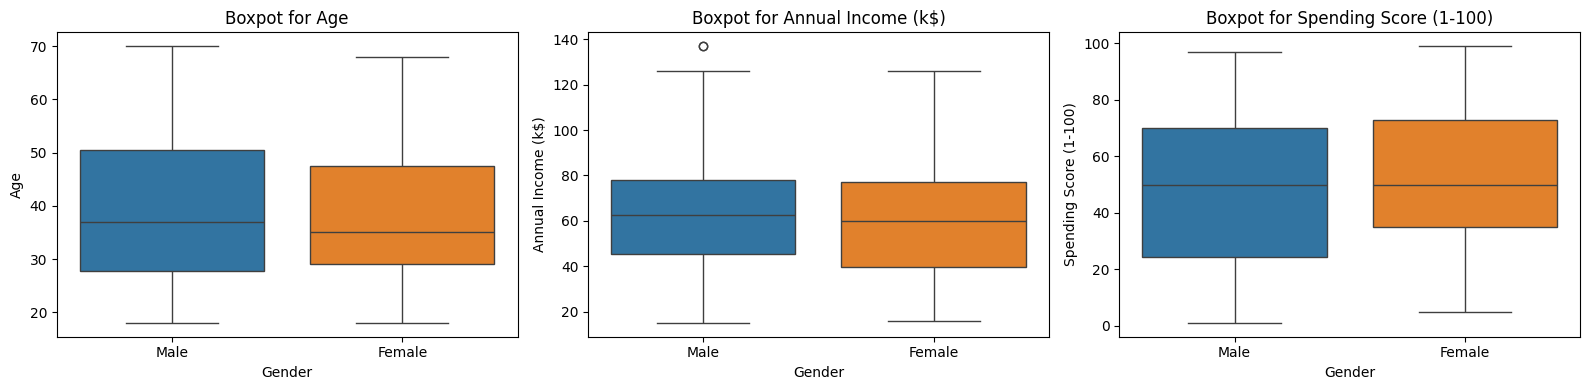

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(16,4))
for i, col in enumerate(num_cols):
  sns.boxplot(data=df, x='Gender', y=df[col], hue='Gender', ax=axes[i])
  axes[i].set_title(f'Boxpot for {col}')
plt.tight_layout()
plt.show()

In [ ]:
df['Gender'].value_counts(normalize=True)

,proportion
Gender,
Female,0.56
Male,0.44


Bivariate Analysis

In [ ]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

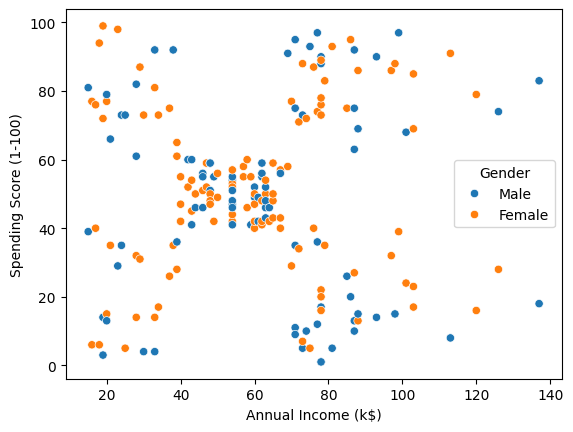

In [ ]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Gender'])
plt.show()

Pairplot

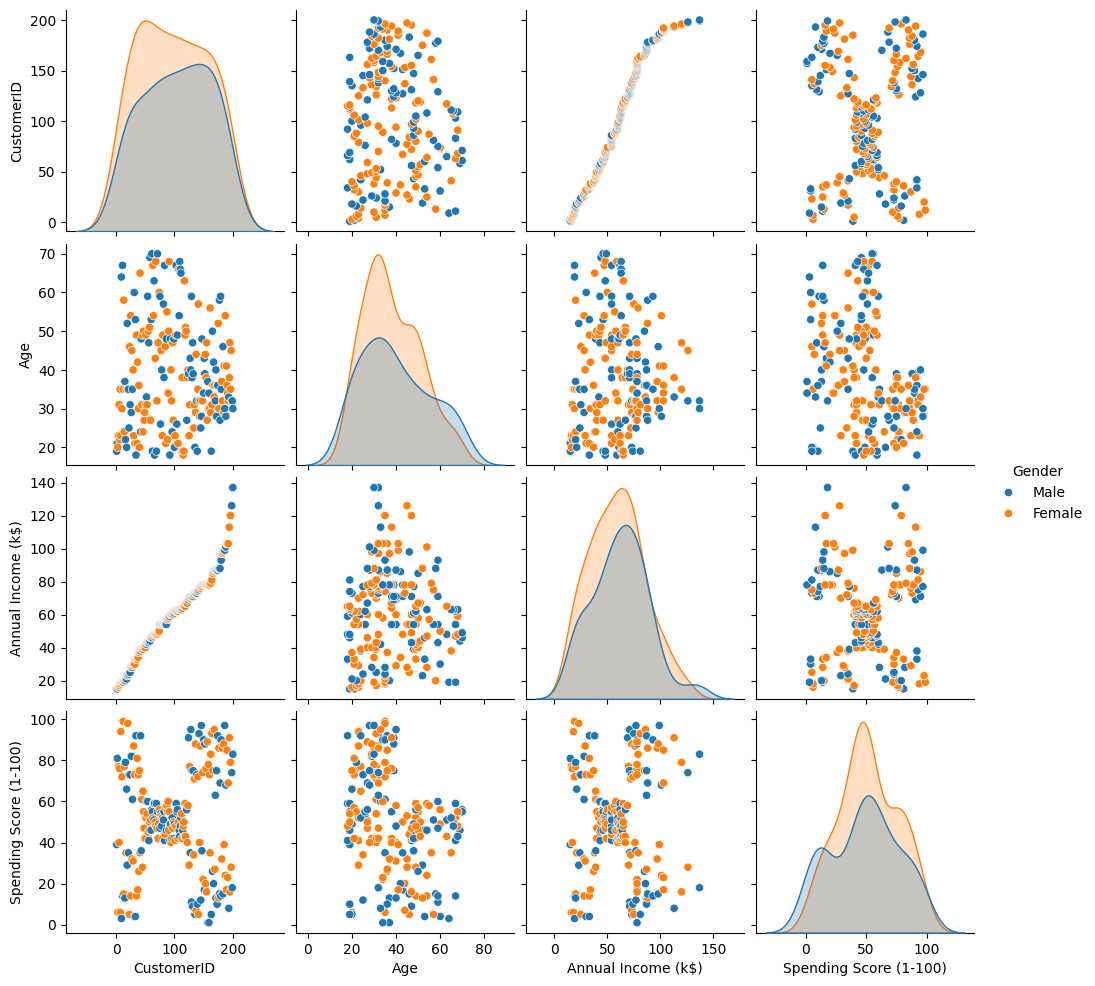

In [ ]:
sns.pairplot(data=df, hue='Gender')
plt.show()

Grouping by gender to see mean

In [ ]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


Correlations using heatmap

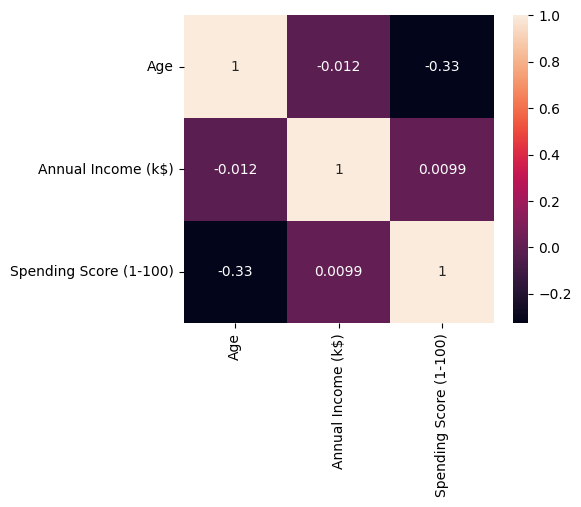

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df[num_cols].corr(), annot=True)
plt.show()

## Clustering

In [ ]:
from sklearn.cluster import KMeans

### Univariate Clustering

Using elbow method to determine the number of clusters

In [ ]:
inertia_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)']])
  inertia_scores.append(kmeans.inertia_)

In [ ]:
inertia_scores

[137277.2800000002,
 48660.88888888887,
 23528.152173913048,
 13278.112713472474,
 8481.49619047619,
 5081.484660267269,
 4255.07496947497,
 3449.39407230197,
 2548.1313131313127,
 1914.8932733932731]

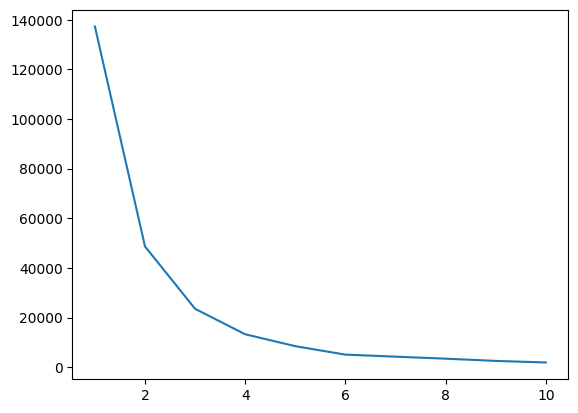

In [ ]:
plt.plot(range(1,11), inertia_scores)
plt.show()

We have elbow like bend at K=3

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [ ]:
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [ ]:
df['Income_cluster'] = kmeans.labels_

In [ ]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2


Grouping by income cluster

In [ ]:
df.groupby(['Income_cluster'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income_cluster,,,
0,41.279070,60.906977,50.337209
1,36.910714,92.142857,50.517857
2,37.120690,29.551724,49.689655


### Bivariate Clustering

In [ ]:
# Determining value of K

inertia_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
  inertia_scores.append(kmeans.inertia_)

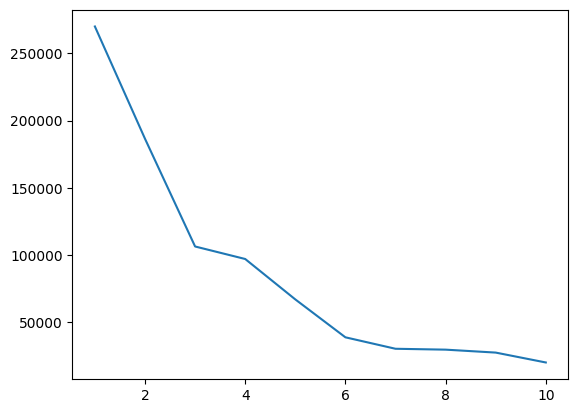

In [ ]:
plt.plot(range(1,11), inertia_scores)
plt.show()

We take k=6

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=6)

In [ ]:
df['income_spending_label'] = kmeans.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,income_spending_label
0,1,Male,19,15,39,2,5
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,5
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,5


In [ ]:
df.groupby(['income_spending_label'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income_spending_label,,,
0,41.000000,109.700000,22.000000
1,40.629630,79.000000,16.592593
2,42.936709,54.886076,49.898734
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205
5,45.217391,26.304348,20.913043


Determining Centroids

In [ ]:
kmeans.cluster_centers_

array([[109.7       ,  22.        ],
       [ 79.        ,  16.59259259],
       [ 54.88607595,  49.89873418],
       [ 25.72727273,  79.36363636],
       [ 86.53846154,  82.12820513],
       [ 26.30434783,  20.91304348]])

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = ['x', 'y']
centroids

,x,y
0,109.700000,22.000000
1,79.000000,16.592593
2,54.886076,49.898734
3,25.727273,79.363636
4,86.538462,82.128205
5,26.304348,20.913043


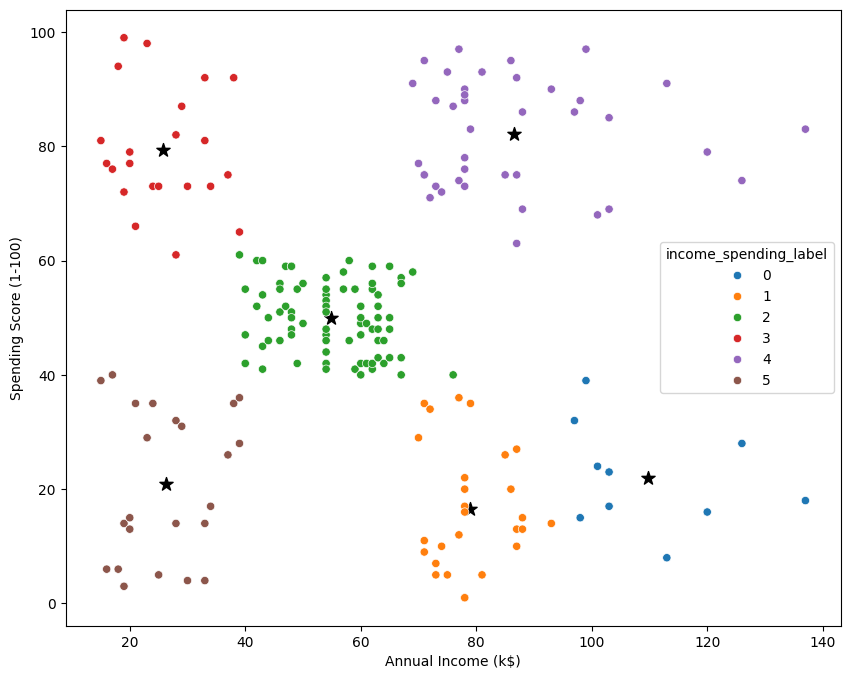

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(centroids['x'], centroids['y'], s=100, c='black', marker='*')
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='income_spending_label', palette='tab10')
plt.show()

In [ ]:
pd.crosstab(df['income_spending_label'], df['Gender'], normalize='index')

Gender,Female,Male
income_spending_label,,
0,0.700000,0.300000
1,0.370370,0.629630
2,0.594937,0.405063
3,0.590909,0.409091
4,0.538462,0.461538
5,0.608696,0.391304


### Multivariate Analysis

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,income_spending_label
0,1,Male,19,15,39,2,5
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,5
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,5


In [ ]:
df1 = df.copy()

Dropping columns

In [ ]:
df1 = df1.drop(['CustomerID', 'Income_cluster', 'income_spending_label'], axis=1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


One hot encoding Gender column

In [ ]:
df1 = pd.get_dummies(df1, drop_first=True, dtype=int)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df1 = pd.DataFrame(scaler.fit_transform(df1))

In [ ]:
df1.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


Clustering

In [ ]:
inertia_scores = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df1)
  inertia_scores.append(kmeans.inertia_)

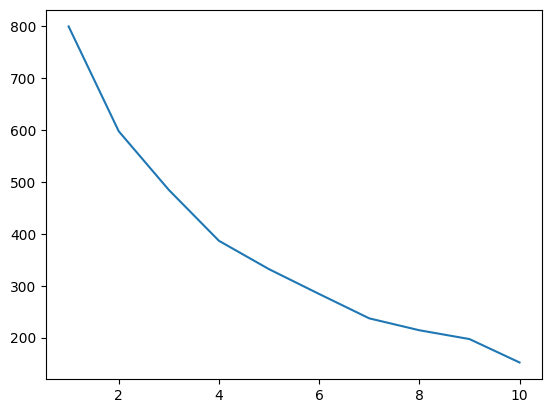

In [ ]:
plt.plot(range(1,11), inertia_scores)
plt.show()

We take k=7

In [ ]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df1)

KMeans(n_clusters=7)

In [ ]:
df['cluster_label_all'] = kmeans.labels_
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_cluster,income_spending_label,cluster_label_all
0,1,Male,19,15,39,2,5,1
1,2,Male,21,15,81,2,3,1
2,3,Female,20,16,6,2,5,5


In [ ]:
df.groupby(['cluster_label_all'])[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_label_all,,,
0,32.416667,89.125000,80.416667
1,28.410256,58.230769,70.717949
2,50.578947,47.710526,40.736842
3,57.214286,46.785714,38.714286
4,38.473684,85.894737,14.210526
5,25.945946,42.216216,57.459459
6,44.600000,92.333333,21.600000


In [ ]:
pd.crosstab(df['cluster_label_all'], df['Gender'], normalize='index')

Gender,Female,Male
cluster_label_all,,
0,0.916667,0.083333
1,0.000000,1.000000
2,1.000000,0.000000
3,0.000000,1.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,1.000000,0.000000
